## Big Data Management Assignment 2

In [3]:
# Import the necessary libraries 
import pandas as pd
import json

In [4]:
# Connect to the database 
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current


# connect to the mongoclient
client = MongoClient('mongodb://localhost:27017/')


# get the database
database = client['youtube']


# get collection videos
videos = database.get_collection("videos")

In [ ]:
# create weekly demand collection
database.create_collection("videos")

#### Import data into database youtube for GB and US

In [5]:
# get collection videos
videos = database.get_collection("videos")

# open the weekly_demand json file
with open("GBvideos.json") as f:
    file_data = json.load(f)
# insert the data into the collection
videos.insert_many(file_data)


# open the weekly_demand json file
with open("USvideos.json") as f:
    file_data = json.load(f)
# insert the data into the collection
videos.insert_many(file_data)

#### Break tags into an Array 

In [3]:
# Break tags into an Array  

tags_format = [
   {
      "$addFields":{
         "tags":{
            "$replaceAll":{
               "input":"$tags",
               "find":"\"",
               "replacement":""
            }
         }
      }
   },
   {
      "$addFields":{
         "tags":{
            "$split":[
               "$tags",
               "|"
            ]
         }
      }
   }
]

videos.update_many({}, tags_format)

In [12]:
# Change data types 
'''
client['youtubedb']['videos'].types.aggregate(
  [
    {
      "$project":
        { 
          "_id": 0,
          "views": { "$toInt": "$double" },
          "likes": { "$toInt": "$double" },
          "dislikes": { "$toInt": "$double" }
        }
    }
  ]
)

'''

### Question 1

In [5]:
# query 
filter={
    'country': 'GB', 
    'channel_title': 'Saturday Night Live'
}
project={
    'title': 1, 
    'views': 1, 
    'likes': 1, 
    'dislikes': 1
}
sort=list({
    'views': -1
}.items())


q1 = videos.find(
  filter=filter,
  projection=project,
  sort=sort
)


In [6]:
# convert to dataframe 
q1_data = pd.DataFrame(q1)

In [8]:
q1_data.head(20)

,_id,title,views,likes,dislikes
0,62b4d400980e6df89e3fe27f,Royal Wedding - SNL,8607264,66559,14179
1,62b4d400980e6df89e3fe1d7,Royal Wedding - SNL,8589119,66465,14171
2,62b4d400980e6df89e3fe127,Royal Wedding - SNL,8570085,66379,14165
3,62b4d400980e6df89e3fe07b,Royal Wedding - SNL,8548321,66287,14154
4,62b4d400980e6df89e3fdfd3,Royal Wedding - SNL,8534145,66248,14148
5,62b4d400980e6df89e3fdf21,Royal Wedding - SNL,8503729,66130,14116
6,62b4d400980e6df89e3fde6e,Royal Wedding - SNL,8482595,66039,14099
7,62b4d400980e6df89e3fddbd,Royal Wedding - SNL,8457468,65930,14088
8,62b4d400980e6df89e3fdd0d,Royal Wedding - SNL,8431913,65829,14075
9,62b4d400980e6df89e3fdc60,Royal Wedding - SNL,8390391,65649,14046


In [ ]:
# Or with aggregate 

In [25]:
q1 = videos.aggregate([
{"$match" : { "country" : "GB", 'channel_title': 'Saturday Night Live'} },
{"$project" : {"title": 1 ,"views":1,'likes': 1,'dislikes': 1}},
{"$sort": {"views": -1}}])

# convert to dataframe 
p1_data = pd.DataFrame(q1)


p1_data.head(20)

,_id,title,views,likes,dislikes
0,62ae135f763701a6ac20ad70,Royal Wedding - SNL,8607264,66559,14179
1,62ae135f763701a6ac20acc8,Royal Wedding - SNL,8589119,66465,14171
2,62ae135f763701a6ac20ac18,Royal Wedding - SNL,8570085,66379,14165
3,62ae135f763701a6ac20ab6c,Royal Wedding - SNL,8548321,66287,14154
4,62ae135f763701a6ac20aac4,Royal Wedding - SNL,8534145,66248,14148
5,62ae135f763701a6ac20aa12,Royal Wedding - SNL,8503729,66130,14116
6,62ae135f763701a6ac20a95f,Royal Wedding - SNL,8482595,66039,14099
7,62ae135f763701a6ac20a8ae,Royal Wedding - SNL,8457468,65930,14088
8,62ae135f763701a6ac20a7fe,Royal Wedding - SNL,8431913,65829,14075
9,62ae135f763701a6ac20a751,Royal Wedding - SNL,8390391,65649,14046


#### Remarks on results 

It seems that likes and dislikes follows the views 




### Question 2

In [9]:
videos.count_documents({})

79865

In [13]:
'''
q2 = client['youtubedb']['videos'].aggregate([
{"$match" : { "country" : "GB"} },
{"$count" : "tags"}
{"$project" : {"video_id": 1,"title": 1 ,"views": 1,'likes': 1,'dislikes': 1}},
{"$group" : {"_id":"$channel_title", "num_tags":{ "$sum":1}}},
{"$sort": {"views": -1}}])
''' 

In [10]:
q2 =videos.aggregate([
   {
      "$project": {
         "video_id": 1,
         "views" :1,
         "num_tags": { "$cond": { "if": { "$isArray": "$tags" }, "then": { "$size": "$tags" }, "else": "NA"} }
      }
   },
    
   {
       "$sort": {"views":-1}  
   } 
] )

In [11]:
# convert to dataframe 
q2_data = pd.DataFrame(q2)

In [12]:
q2_data.head(20)

,_id,video_id,views,num_tags
0,62b4d3ff980e6df89e3fb9a2,_I_D_8Z4sJE,424538912,33
1,62b4d3ff980e6df89e3fb8da,_I_D_8Z4sJE,413586699,33
2,62b4d3ff980e6df89e3fb80e,_I_D_8Z4sJE,402650804,33
3,62b4d3fe980e6df89e3fb749,_I_D_8Z4sJE,392036878,33
4,62b4d3fe980e6df89e3fb685,_I_D_8Z4sJE,382401497,33
5,62b4d3fe980e6df89e3fb5c6,_I_D_8Z4sJE,372399338,33
6,62b4d3fe980e6df89e3fb50f,_I_D_8Z4sJE,362111555,33
7,62b4d3fe980e6df89e3fb452,_I_D_8Z4sJE,349987176,33
8,62b4d3fe980e6df89e3fb393,_I_D_8Z4sJE,339629489,33
9,62b4d400980e6df89e3fd142,9jI-z9QN6g8,337621571,9


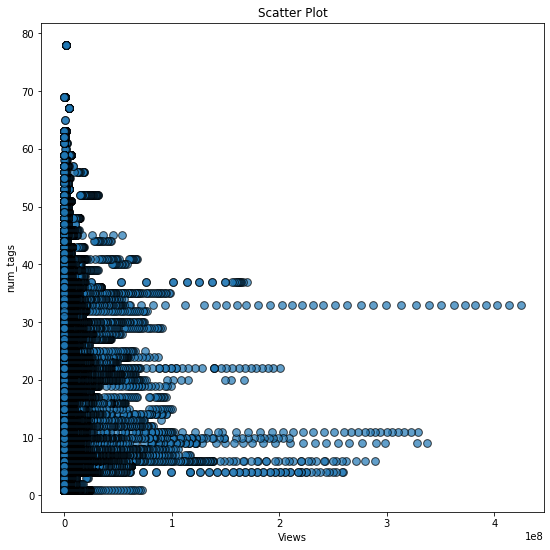

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the data 
x = q2_data['views']

y = q2_data["num_tags"]

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Add labels 
plt.xlabel('Views')
plt.ylabel('num_tags')
plt.title('Scatter Plot')
plt.show()

In [19]:
# Outliers for views  

Q1,Q3 = np.percentile(q2_data['views'] , [25,75])

IQR = Q3 - Q1
upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR

outliers = q2_data[(q2_data['views'] > upperlimit) | (q2_data['views'] < lowerlimit)]
outliers


,_id,video_id,views,num_tags
0,62b4d3ff980e6df89e3fb9a2,_I_D_8Z4sJE,424538912,33
1,62b4d3ff980e6df89e3fb8da,_I_D_8Z4sJE,413586699,33
2,62b4d3ff980e6df89e3fb80e,_I_D_8Z4sJE,402650804,33
3,62b4d3fe980e6df89e3fb749,_I_D_8Z4sJE,392036878,33
4,62b4d3fe980e6df89e3fb685,_I_D_8Z4sJE,382401497,33
...,...,...,...,...
10242,62b4d3dc980e6df89e3f1230,ZCPwpcurYns,5973627,9
10243,62b4d3fb980e6df89e3f69cf,inZzcTXYowY,5973522,4
10244,62b4d3fe980e6df89e3fa49b,mctn16hLzhg,5973411,42
10245,62b4d3fe980e6df89e3fa698,9S1Gc1nSXd4,5973102,35


In [20]:
# Outliers for num_tags  

Q1,Q3 = np.percentile(q2_data['num_tags'] , [25,75])

IQR = Q3 - Q1
upperlimit = Q3+1.5*IQR
lowerlimit = Q1-1.5*IQR

outliers = q2_data[(q2_data['num_tags'] > upperlimit) | (q2_data['num_tags'] < lowerlimit)]
outliers

,_id,video_id,views,num_tags
7605,62b4d400980e6df89e3fd36c,PfLCyR6Efvw,8581199,57
8252,62b4d400980e6df89e3fd2d2,PfLCyR6Efvw,7894623,57
10034,62b4d3fc980e6df89e3f90c9,ceyU5UBumLU,6132079,59
10040,62b4d3fc980e6df89e3f9003,ceyU5UBumLU,6128584,59
10050,62b4d3fc980e6df89e3f8f3f,ceyU5UBumLU,6121422,59
...,...,...,...,...
78003,62b4d3d8980e6df89e3eba28,piyds9slayg,19484,62
78075,62b4d3d8980e6df89e3eb952,piyds9slayg,18769,62
78272,62b4d3d8980e6df89e3eb85e,piyds9slayg,16766,62
78392,62b4d3fc980e6df89e3f8305,_gRC4L6lNoc,15350,57


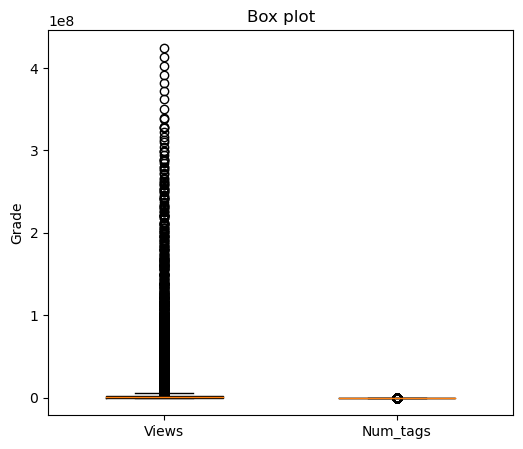

In [30]:
# Boxplot 
fig = plt.figure(figsize=(6,5))



plt.boxplot([q2_data['views'], q2_data['num_tags']], widths=0.5)
plt.xticks([1,2],['Views', 'Num_tags'])
plt.ylabel('Grade')
plt.title('Box plot')
plt.show()

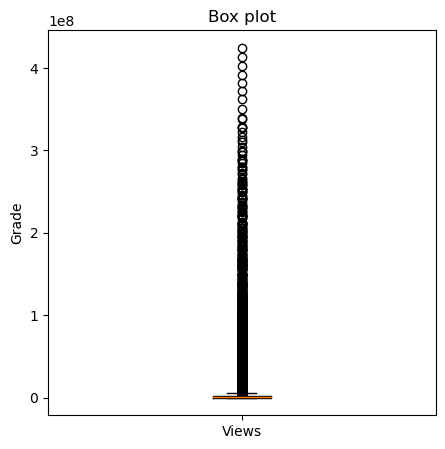

In [32]:
# Boxplot Num of Views
fig = plt.figure(figsize=(5,5))

plt.boxplot(q2_data['views'])
plt.ylabel('Grade')
plt.xticks([1],['Views'])
plt.title('Box plot')
plt.show()

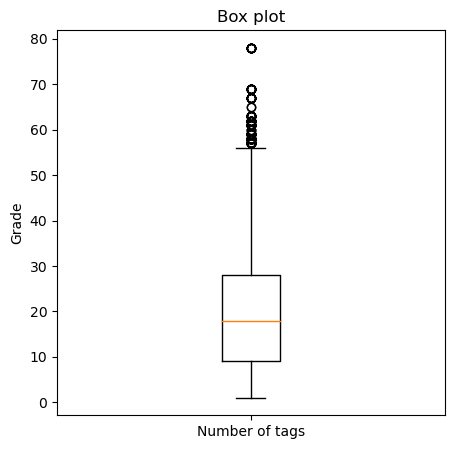

In [34]:
# Boxplot Num of tags
fig = plt.figure(figsize=(5,5))

plt.boxplot(q2_data['num_tags'])
plt.ylabel('Grade')
plt.xticks([1],['Number of tags'])
plt.title('Box plot')
plt.show()

##### Remarks 

According to our results, the number of views and tags are independent measures. The number of views from the tags is not affected, so the views in a video do not increase if it has more tags. Clearly, in each case, there are outliers but the issue of views we consider to be other factors and not the tags. For example, the large number of views may be due to the advertising of the video that has been made, the artist the type of video.

### Question 3

In [35]:
# For GB 

In [36]:

q3_1 = videos.aggregate([
    {"$match" : { "country" : "GB", 'comments_disabled': 'False'}},
    { "$unwind": "$tags"},
    {"$group" : { "_id" : "$tags"  ,"count_tags": {"$count":{}}}},
    {"$sort": {"count_tags":-1}} 
])



# convert to dataframe 
q3_1_data = pd.DataFrame(q3_1)


q3_1_data.head(20)

,_id,count_tags
0,funny,2570
1,comedy,2305
2,music,1956
3,[none],1955
4,Pop,1556
5,2018,1383
6,video,1174
7,music video,1144
8,Records,1137
9,official,1106


In [37]:
#Plot top 20 results 

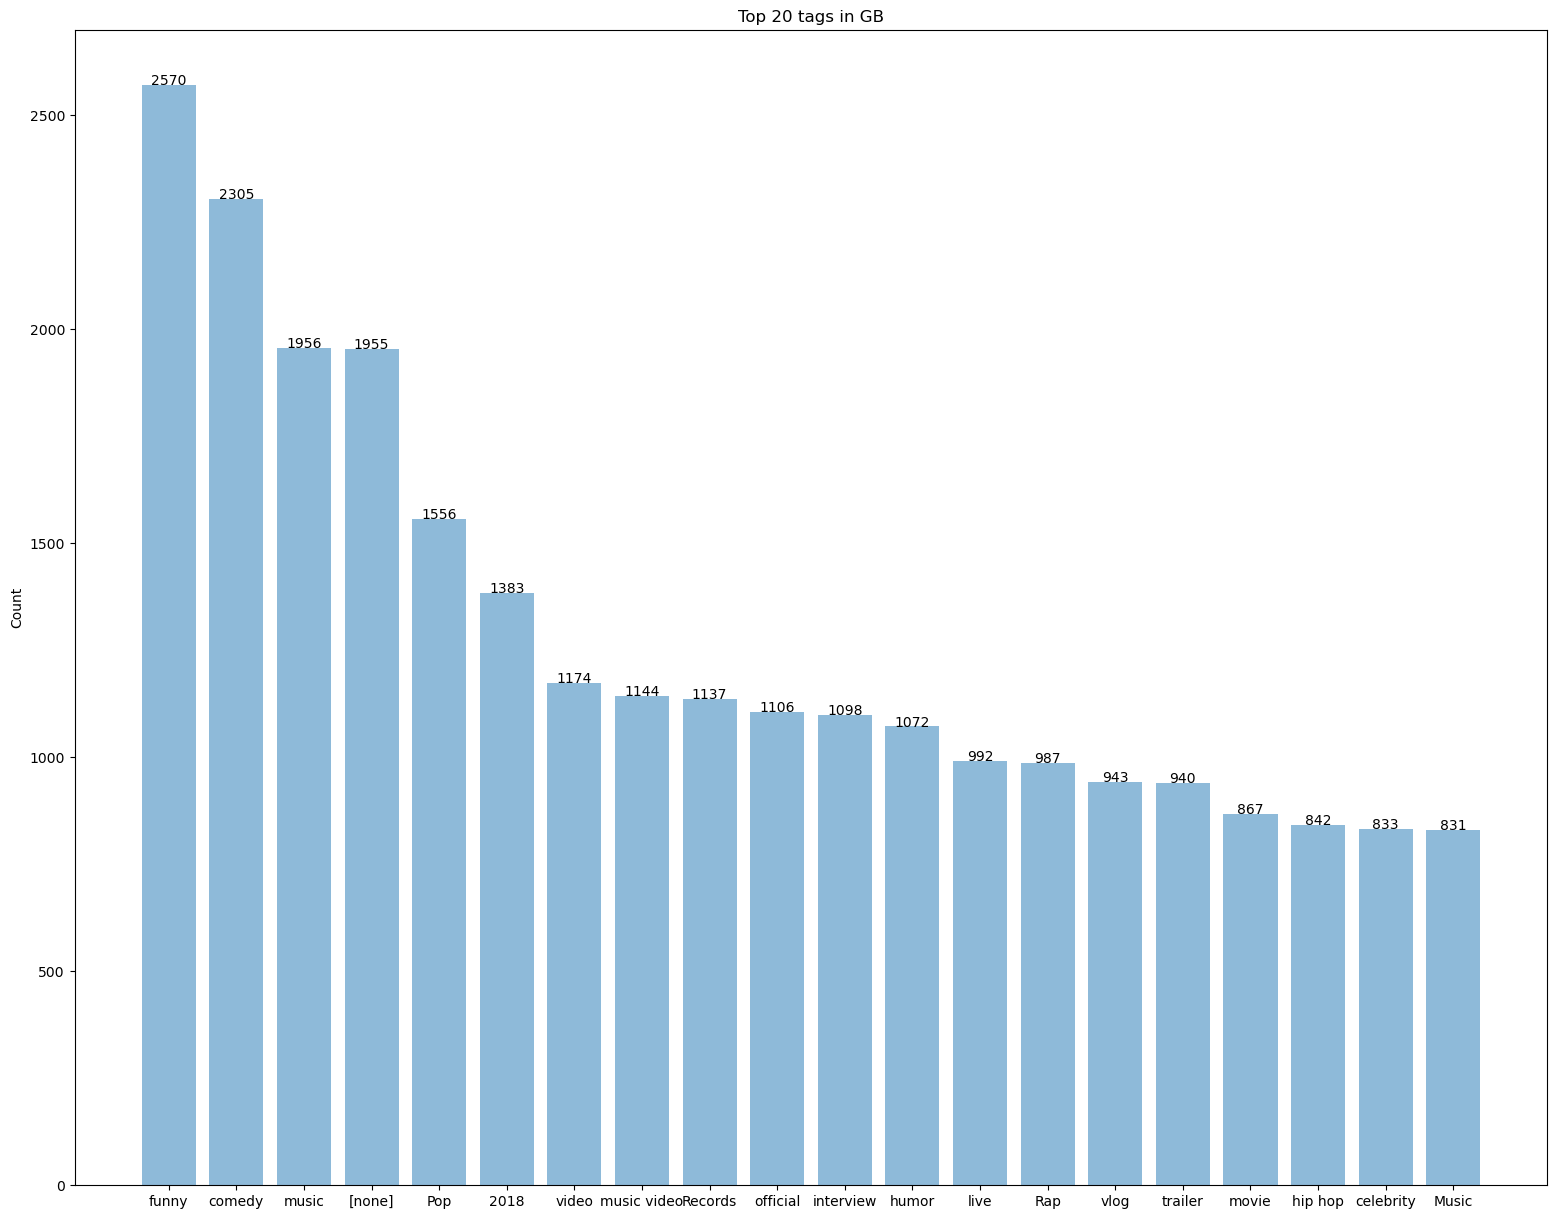

In [50]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        

fig = plt.figure(figsize=(19,15))

objects = q3_1_data.head(20)['_id']
y_pos = np.arange(len(objects))
tags = q3_1_data.head(20)['count_tags']

plt.bar(y_pos, tags, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Top 20 tags in GB')

# add number labels 
addlabels(objects, tags)

plt.show()

In [ ]:
# For USA 

In [47]:
q3 = videos.aggregate([
    {"$match" : { "country" : "US", 'comments_disabled': 'False'}},
    { "$unwind": "$tags"},
    {"$group" : { "_id" : "$tags"  ,"count_tags": {"$count":{}}}},
    {"$sort": {"count_tags":-1}} 
])



# convert to dataframe 
q3_data = pd.DataFrame(q3)


q3_data.head(20)

,_id,count_tags
0,funny,3595
1,comedy,2919
2,how to,1604
3,[none],1463
4,music,1298
5,Pop,1280
6,2018,1228
7,humor,1185
8,food,1159
9,science,1107


In [41]:
# Plot for USA

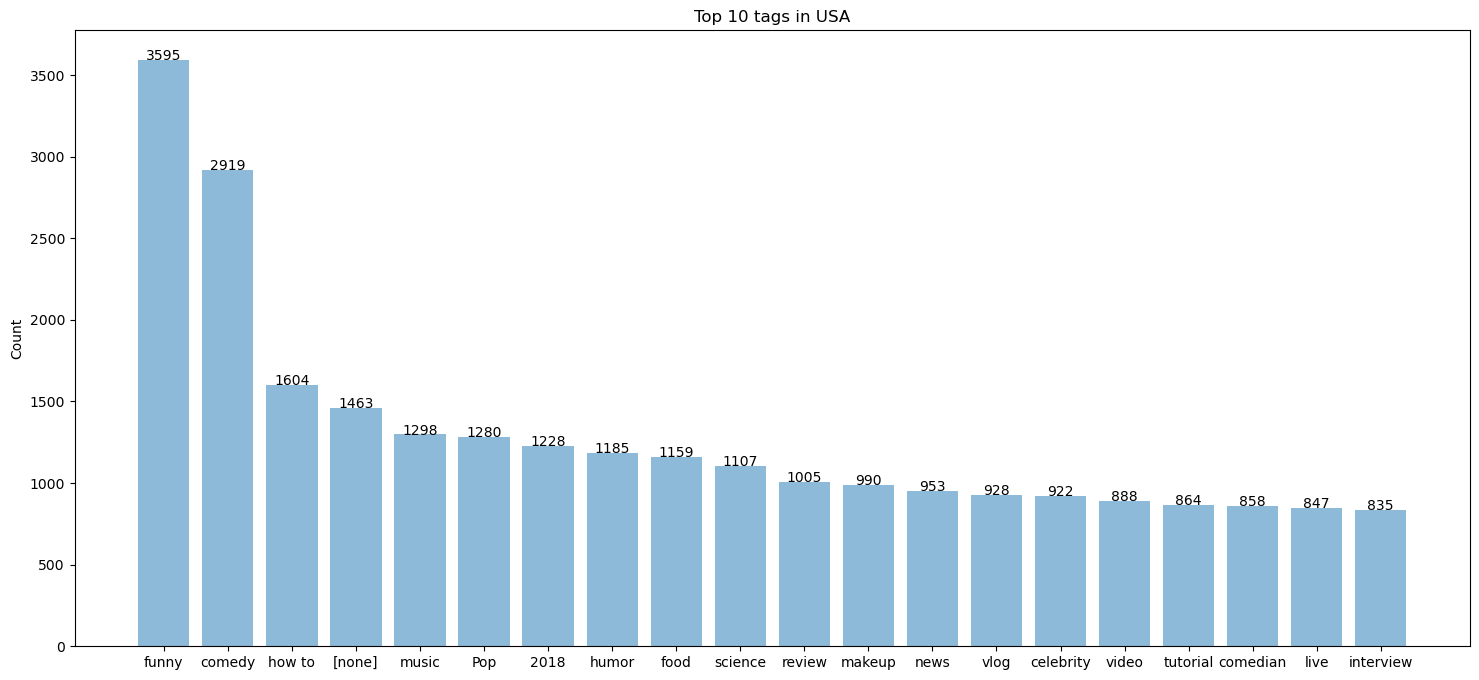

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        

fig = plt.figure(figsize=(18,8))

objects = q3_data.head(20)['_id']
y_pos = np.arange(len(objects))
tags = q3_data.head(20)['count_tags']

plt.bar(y_pos, tags, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Top 10 tags in USA')

# add number labels 
addlabels(objects, tags)

plt.show()

#### Remarks 


It is observed that the main labels such as funny, comedy appear in both areas. In general, the number of labels in the US is larger than the BG, this makes sense as one area has a larger population than the other. Note that there are many "None" in the two regions, perhaps because the youtuber has blocked the tags or the user did not find the video interesting.



### Question 4

In [9]:
#For enabled comments 

In [51]:
q4 = videos.aggregate([
    
    {"$match" : 
                   { "country" : "GB", 'comments_disabled': 'False'}
        
    },
    
    {
        "$group" : 
            { 
              "_id" : "Enabled" ,
              "average_num_views": { "$avg" : "$views"},
              "average_num_likes": { "$avg" : "$likes"},
              "average_num_dislikes":{"$avg" :"$dislikes"}
            } 
    }

])



# convert to dataframe 
q4_data = pd.DataFrame(q4)


q4_data.head(20)

,_id,average_num_views,average_num_likes,average_num_dislikes
0,Enabled,5.927497e+06,136470.094552,7673.412732


In [52]:
q4_data.iloc[0][1:].values

array([5927496.912824, 136470.09455182694, 7673.412732456255],
      dtype=object)

In [ ]:
# Plot in barplot 

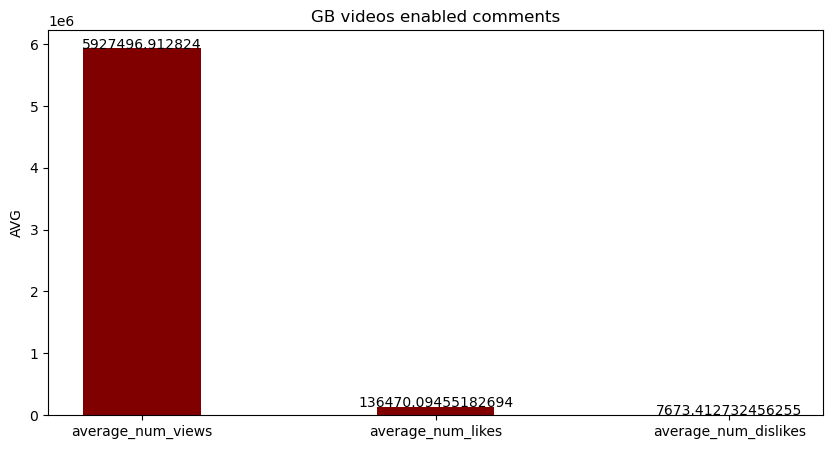

In [53]:

import matplotlib.pyplot as plt


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
  
fig = plt.figure(figsize = (10, 5))

labels = q4_data.columns[1:]
values = q4_data.iloc[0][1:].values
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)

# add number labels 
addlabels(labels, values)

 
#Labels
plt.ylabel("AVG")
plt.title("GB videos enabled comments")
plt.show()

In [54]:
# For disabled comments 

In [55]:
q4 = videos.aggregate([
    
    {"$match" : 
                   { "country" : "GB", 'comments_disabled': 'True'}
        
    },
    
    {
        "$group" : 
            { 
              "_id" : "Disabled" ,
              "average_num_views": { "$avg" : "$views"},
              "average_num_likes": { "$avg" : "$likes"},
              "average_num_dislikes":{"$avg" :"$dislikes"}
            } 
    }

])



# convert to dataframe 
q4_data = pd.DataFrame(q4)


q4_data.head(20)

,_id,average_num_views,average_num_likes,average_num_dislikes
0,Disabled,5.041301e+06,25332.09224,4206.14202


In [56]:
# Plot in barplot 

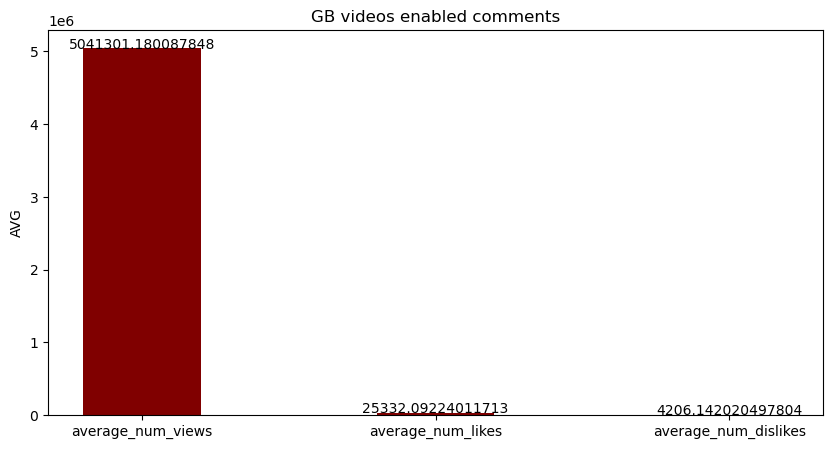

In [57]:

import matplotlib.pyplot as plt


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
  
fig = plt.figure(figsize = (10, 5))

labels = q4_data.columns[1:]
values = q4_data.iloc[0][1:].values
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)

# add number labels 
addlabels(labels, values)

 
#Labels
plt.ylabel("AVG")
plt.title("GB videos enabled comments")
plt.show()

### Question 5

In [ ]:
# Change date format 

time_format = [
    {
        '$set': {
            'publish_time': {
                '$dateFromString': {
                    'dateString': '$publish_time'
                }
            }
        }
    }
]
videos.update_many({}, time_format)

In [58]:
from datetime import datetime

# convert your date string to datetime object
start = datetime(2017, 12, 5)
end = datetime(2018, 3, 5)


q5 = videos.aggregate([
    {"$match" :{'publish_time': {'$lt': end, '$gte': start}, "country" : "GB"}},
      {
        "$group": {
          "_id": {
            "year": { "$year": "$publish_time" },
            "month": { "$month": "$publish_time" },
            "day": { "$dayOfMonth": "$publish_time"}
          },
          "count": { "$sum": 1 }
        }
      },
    {"$sort": {"_id":1}}
    ])
    

# convert to dataframe 
q5_data = pd.DataFrame(q5)


q5_data.head(20)


,_id,count
0,"{'year': 2017, 'month': 12, 'day': 5}",130
1,"{'year': 2017, 'month': 12, 'day': 6}",405
2,"{'year': 2017, 'month': 12, 'day': 7}",254
3,"{'year': 2017, 'month': 12, 'day': 8}",293
4,"{'year': 2017, 'month': 12, 'day': 9}",77
5,"{'year': 2017, 'month': 12, 'day': 10}",114
6,"{'year': 2017, 'month': 12, 'day': 11}",295
7,"{'year': 2017, 'month': 12, 'day': 12}",245
8,"{'year': 2017, 'month': 12, 'day': 13}",345
9,"{'year': 2017, 'month': 12, 'day': 14}",367


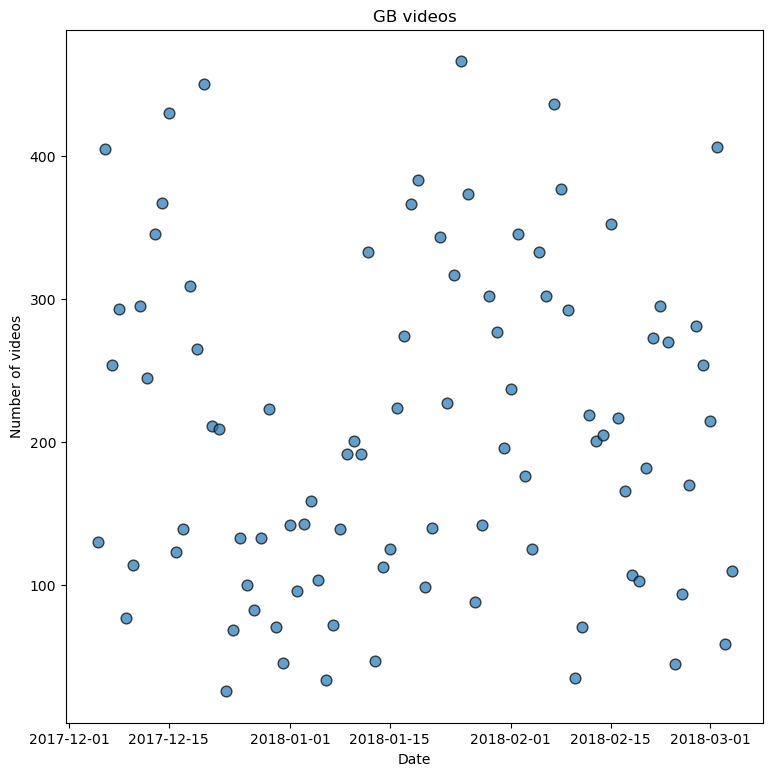

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def date_(x): 
    
    return datetime(x['year'], x['month'], x['day'])

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the data 
x = q5_data['_id'].map(date_)

y = q5_data["count"]

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")


#Labels
plt.ylabel("Number of videos")
plt.xlabel("Date")
plt.title("GB videos")
plt.show()

### Back up

In [65]:
x =   videos.aggregate([
         {"$project":
          {"year": { "$year": "$publish_time" },
           "month": { "$month": "$publish_time" },
           "day": { "$dayOfMonth": "$publish_time"}
            }                         
          }
        ])

    
# convert to dataframe 
q5_data = pd.DataFrame(x)


q5_data.head(5)   

,_id,year,month,day
0,62b4d3d7980e6df89e3eaab1,2017,11,13
1,62b4d3d7980e6df89e3eaab2,2017,11,13
2,62b4d3d7980e6df89e3eaab3,2017,11,12
3,62b4d3d7980e6df89e3eaab4,2017,11,13
4,62b4d3d7980e6df89e3eaab5,2017,11,12


In [66]:
x = videos.aggregate(
       [
         {
           "$project": {
             "_id": 0,
              "dateString": { "$dateToString": { "format": "%Y-%m-%d", "date": "$publish_time" } }
           }
         }
       ]
    )

# convert to dataframe 
q5_data = pd.DataFrame(x)


q5_data.head(5) 

,dateString
0,2017-11-13
1,2017-11-13
2,2017-11-12
3,2017-11-13
4,2017-11-12
